In [6]:
from google.colab import files
import pandas
# upload a file from local disk
#uploaded = files.upload()

# Get the uploaded file  name
#filename = next(iter(uploaded))

# Set the file path for the PDF file in the Colab environment
#file_path = '/content/' + filename


In [7]:
excel_data = pandas.read_csv('/content/GBvideos.csv')
excel_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [4]:
# Identify and handle missing values
excel_data = excel_data.dropna()


In [5]:
# Identify and remove duplicate entries
excel_data = excel_data.drop_duplicates()


In [6]:
# Convert data types if needed, e.g., converting 'publish_time' to datetime
excel_data['publish_time'] = pandas.to_datetime(excel_data['publish_time'])


In [7]:
# Extract month from 'publish_time' for additional insights
excel_data['publish_month'] = excel_data['publish_time'].dt.month


In [8]:
# For k- clustering
from sklearn.cluster import KMeans

# Assuming 'excel_data' is your DataFrame with the features
features = excel_data[['views', 'likes', 'dislikes', 'comment_count']]

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit and predict clusters
excel_data['cluster'] = kmeans.fit_predict(features)

# Print the cluster assignments
print(excel_data[['video_id', 'cluster']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          video_id  cluster
0      Jw1Y-zhQURU        0
1      3s1rvMFUweQ        0
2      n1WpP7iowLc        0
3      PUTEiSjKwJU        0
4      rHwDegptbI4        0
...            ...      ...
38911  l884wKofd54        0
38912  IP8k2xkhOdI        0
38913  Il-an3K9pjg        2
38914  -DRsfNObKIQ        0
38915  4YFo4bdMO8Q        0

[38137 rows x 2 columns]


In [12]:
# 3 for regression
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
X = excel_data[['likes', 'dislikes', 'comment_count']]
y = excel_data['views']

# Create a Linear Regression model
regression_model = LinearRegression()

# Fit the model to the data
regression_model.fit(X, y)

# Coefficients and intercept
coefficients = regression_model.coef_
intercept = regression_model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [  65.30607313  148.81718981 -298.41194688]
Intercept: -155448.87639703136


In [8]:
correlation_matrix = excel_data[['views', 'likes', 'dislikes', 'comment_count']].corr()
print(correlation_matrix)


                  views     likes  dislikes  comment_count
views          1.000000  0.795862  0.392407       0.466899
likes          0.795862  1.000000  0.446746       0.744361
dislikes       0.392407  0.446746  1.000000       0.771772
comment_count  0.466899  0.744361  0.771772       1.000000


In [12]:
from sklearn.decomposition import PCA

# Assuming 'excel_data' is your DataFrame with features
features = excel_data[['views', 'likes', 'dislikes', 'comment_count']]

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
principal_df = pandas.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Print the principal components DataFrame
print(principal_df)


                PC1            PC2
0      1.311271e+06  -97499.199330
1     -4.859399e+06  -37886.779586
2      1.125516e+07  497813.168351
3     -5.885464e+06  -48366.665380
4     -5.903482e+06  -48263.991100
...             ...            ...
38911  1.915488e+07 -150260.091226
38912 -4.420286e+06   -4467.355137
38913  2.373071e+07  -91233.785901
38914  8.404969e+06 -102263.043276
38915 -5.305541e+06  -38835.448379

[38916 rows x 2 columns]


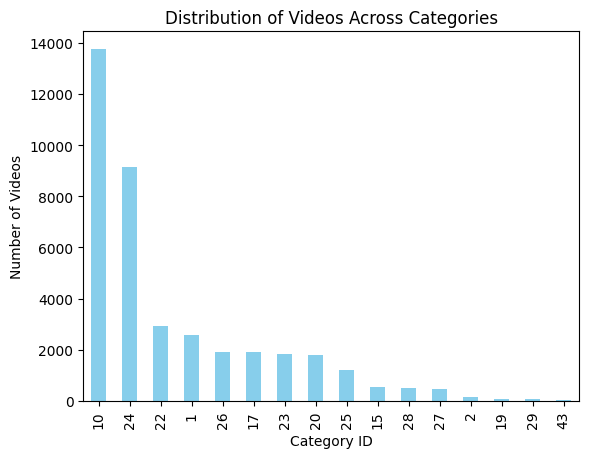

In [13]:
import matplotlib.pyplot as plt

category_counts = excel_data['category_id'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.title('Distribution of Videos Across Categories')
plt.show()


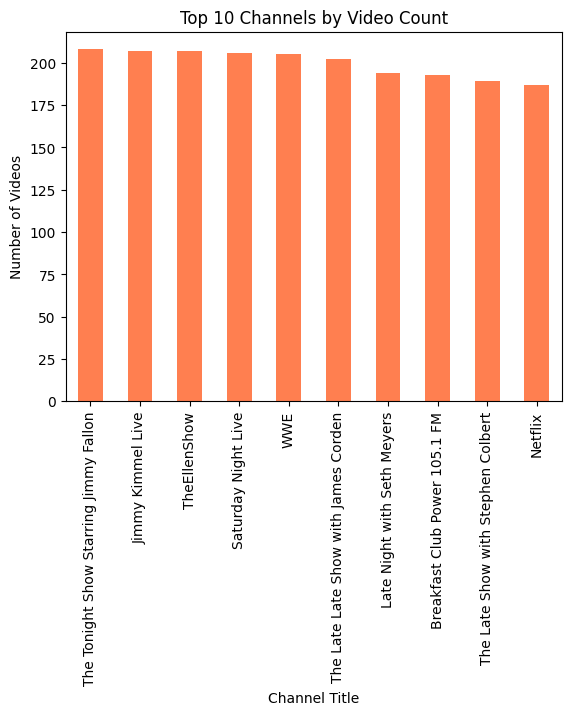

In [14]:
top_channels = excel_data['channel_title'].value_counts().head(10)
top_channels.plot(kind='bar', color='coral')
plt.xlabel('Channel Title')
plt.ylabel('Number of Videos')
plt.title('Top 10 Channels by Video Count')
plt.show()


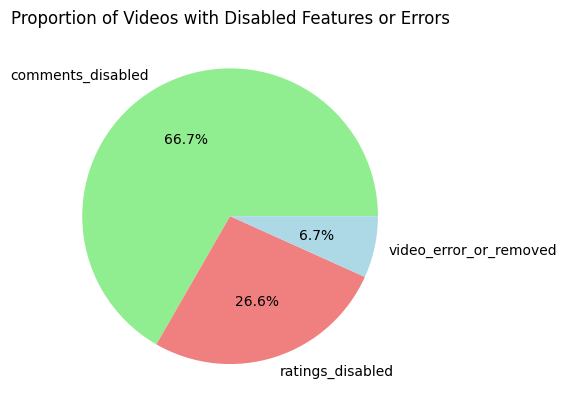

In [15]:
disabled_stats = excel_data[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']].sum()
disabled_stats.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Proportion of Videos with Disabled Features or Errors')
plt.show()


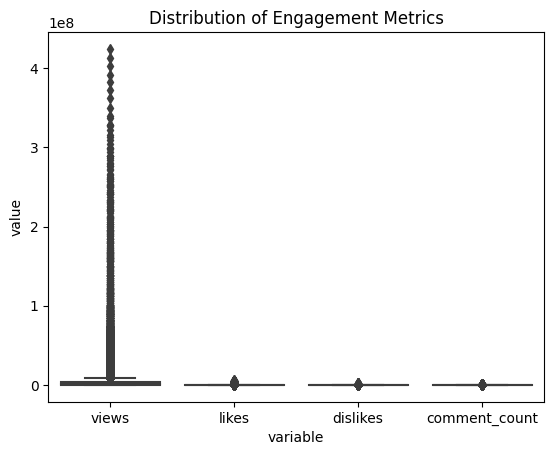

In [16]:
import seaborn as sns

sns.boxplot(x='variable', y='value', data=pandas.melt(excel_data[['views', 'likes', 'dislikes', 'comment_count']]))
plt.title('Distribution of Engagement Metrics')
plt.show()


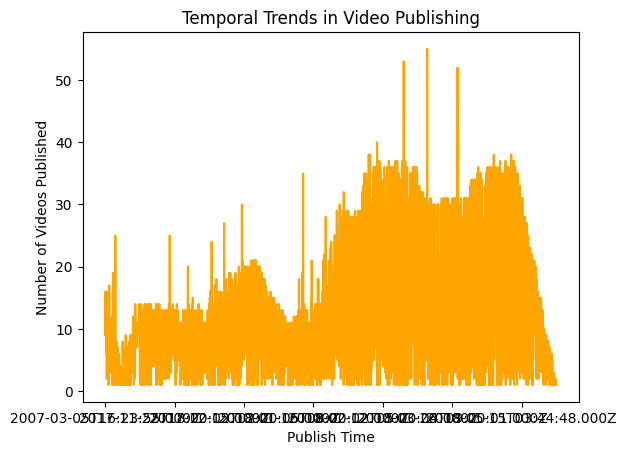

In [17]:
daily_video_count = excel_data.groupby('publish_time').size()
daily_video_count.plot(kind='line', color='orange')
plt.xlabel('Publish Time')
plt.ylabel('Number of Videos Published')
plt.title('Temporal Trends in Video Publishing')
plt.show()


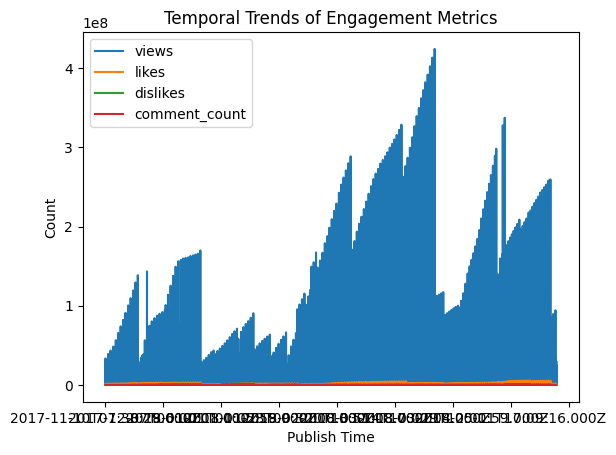

In [18]:
temporal_metrics = excel_data[['publish_time', 'views', 'likes', 'dislikes', 'comment_count']]
temporal_metrics.set_index('publish_time').plot(kind='line')
plt.xlabel('Publish Time')
plt.ylabel('Count')
plt.title('Temporal Trends of Engagement Metrics')
plt.show()


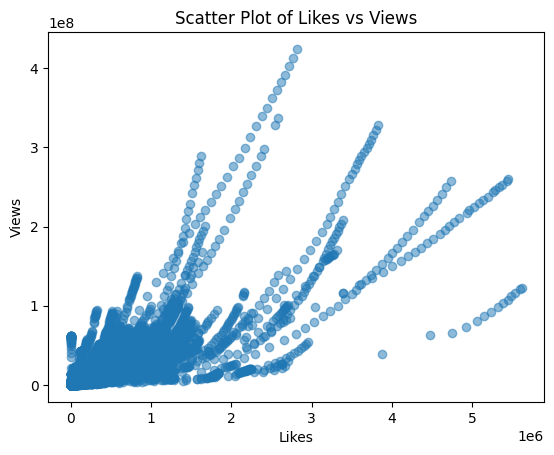

In [19]:
plt.scatter(excel_data['likes'], excel_data['views'], alpha=0.5)
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Scatter Plot of Likes vs Views')
plt.show()
